<a href="https://colab.research.google.com/github/BernasconiLorenzo06/PANDAS_FILE/blob/main/PANDAS_prep_verif_pandas_groupby_matplotlib_insiemi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv")
df

,area,reg,eta,totale_popolazione
0,ABR,Abruzzo,00-04,37923
1,ABR,Abruzzo,05-11,76431
2,ABR,Abruzzo,12-19,94727
3,ABR,Abruzzo,20-29,125230
4,ABR,Abruzzo,30-39,146965
...,...,...,...,...
205,VEN,Veneto,40-49,715790
206,VEN,Veneto,50-59,806474
207,VEN,Veneto,60-69,610635
208,VEN,Veneto,70-79,494721


il numero di record presente nel file

In [ ]:
len(df)

210

2. il numero di regioni presente nel file

In [ ]:
len(set(df["reg"]))

21

3. il numero di abitanti di ogni regione. Ordinare in ordine decrescente sul numero di abitanti

In [ ]:
dfabitanti = df.groupby("reg")[["totale_popolazione"]].sum().sort_values(by = "totale_popolazione", ascending = False).reset_index()
dfabitanti

4. la regione con il numero di abitanti più alto

In [ ]:
dfabitanti[(dfabitanti["totale_popolazione"]) == (dfabitanti["totale_popolazione"].max())]

5. il numero medio di abitanti delle regioni

In [ ]:
dfmediaAbitanti = dfabitanti["totale_popolazione"].mean()
dfmediaAbitanti

6. le regioni che hanno più abitanti della media degli abitanti delle regioni

In [ ]:
dfabitanti[dfabitanti["totale_popolazione"] > dfmediaAbitanti]

7. la regione che ha più abitanti nella fascia 12-19

In [ ]:
dfetada12a19 = df[df["eta"] == "12-19"]
dfetada12a19[dfetada12a19["totale_popolazione"] == dfetada12a19["totale_popolazione"].max()]

8. il numero di abitanti per ogni fascia d'età

In [ ]:
dfabitantiEta = df.groupby("eta")[["totale_popolazione"]].sum().sort_values(by = "totale_popolazione", ascending = False)
dfabitantiEta

9. la fascia d'età con più abitanti

In [ ]:
dfabitantiEta[(dfabitantiEta["totale_popolazione"]) == (dfabitantiEta["totale_popolazione"].max())]

10.  un grafico a barre orizzontali per l'esercizio 3

In [ ]:
import matplotlib.pyplot as plt

In [22]:
labels = dfabitanti['eta']
dati = dfabitanti['totale_popolazione'] 

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, dati, label='totale vaccinati in ogni regione')


KeyError: ignored

11. un grafico a barre verticali per l'esercizio 8

<BarContainer object of 21 artists>

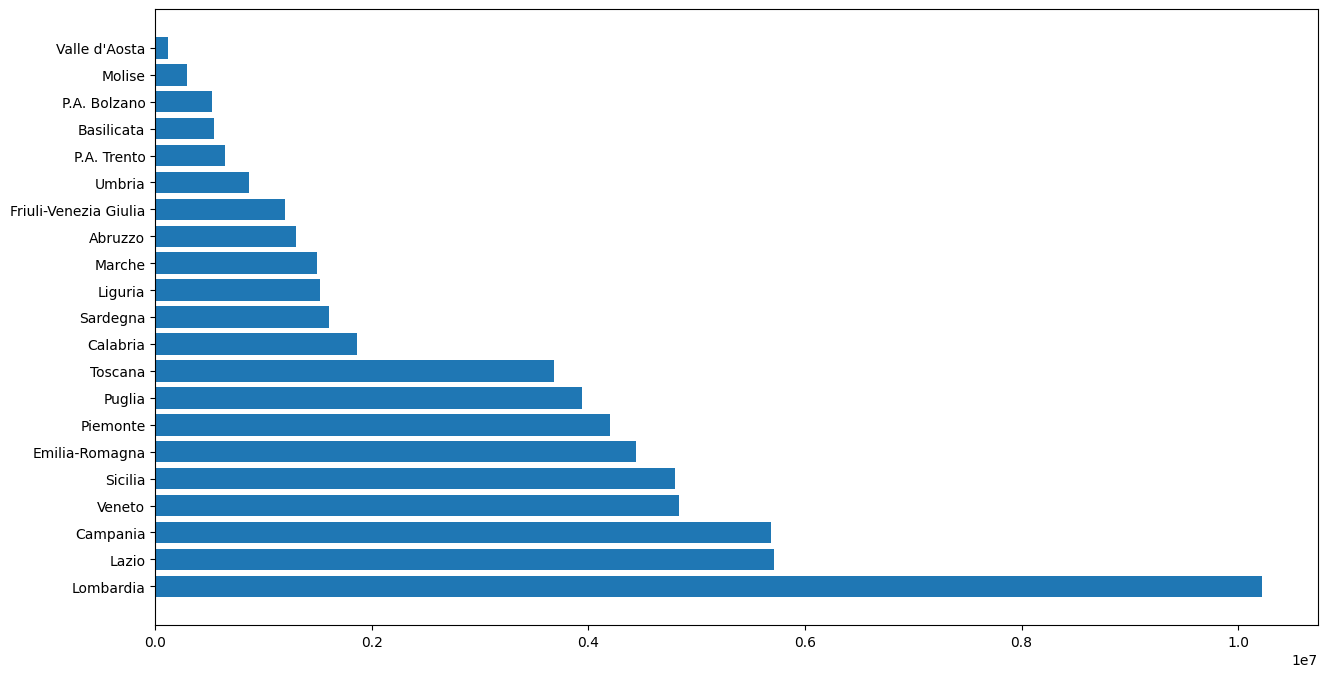

In [24]:
labels = dfabitanti['reg']
dati = dfabitanti['totale_popolazione'] 

fig, ax = plt.subplots(figsize=(15,8))
ax.barh(labels, dati, label='totale vaccinati in ogni regione')


12. un grafico a torta per l'esercizio 3 che riporti le percentuali